In [1]:
#1.Understanding the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [3]:
df = pd.read_csv('dataset.csv')
print(df.shape)
print(df.head(10))

(9000, 11)
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   
5  -0.234137  -0.699415   0.268972  -0.702775   0.702283  -0.332383   
6   1.579213   3.117904  -2.885133   3.312708   0.864708   2.045283   
7   0.767435   1.730870  -1.445877   1.411070   0.874003   0.674730   
8  -0.469474  -0.877919   0.575087  -0.532917  -0.519870        NaN   
9   0.542560   1.314738  -0.403383   1.456165  -0.744625   1.987345   

   feature_7  feature_8     category_1 category_2  target  
0  -1.300105  -2.242241  Above Average   Region C       1  
1  -1.339227  -1.942298  Below Average   Region A       0  
2   1.190238   1.503559    

In [4]:
def print_df_info(df):
    buffer = io.StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())

print_df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB



In [5]:
print(df.isnull().sum())

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64


In [6]:
#Analysis numerical data
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
print("\nnumerical columns:")
print(df[numerical_columns].describe())


numerical columns:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  8600.000000  9000.000000  9000.000000   
mean      0.000427     0.003349     0.003235    -0.008481    -0.002177   
std       1.241318     2.508324     1.542901     2.061784     0.577415   
min     -18.665400   -37.852816    -6.676680    -8.190124    -0.999791   
25%      -0.680062    -1.382610    -1.022085    -1.399928    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.680513     1.380228     1.038571     1.394151     0.497004   
max      21.934496    47.603454     6.203055     8.189001     0.999914   

         feature_6    feature_7    feature_8       target  
count  8500.000000  9000.000000  9000.000000  9000.000000  
mean     -0.006447     0.000592     0.003348     0.475444  
std       1.981615     1.075064     2.043643     0.499424  
min      -8.590782    -4.422265    -9.474989     0.000000  
25%      -1.3

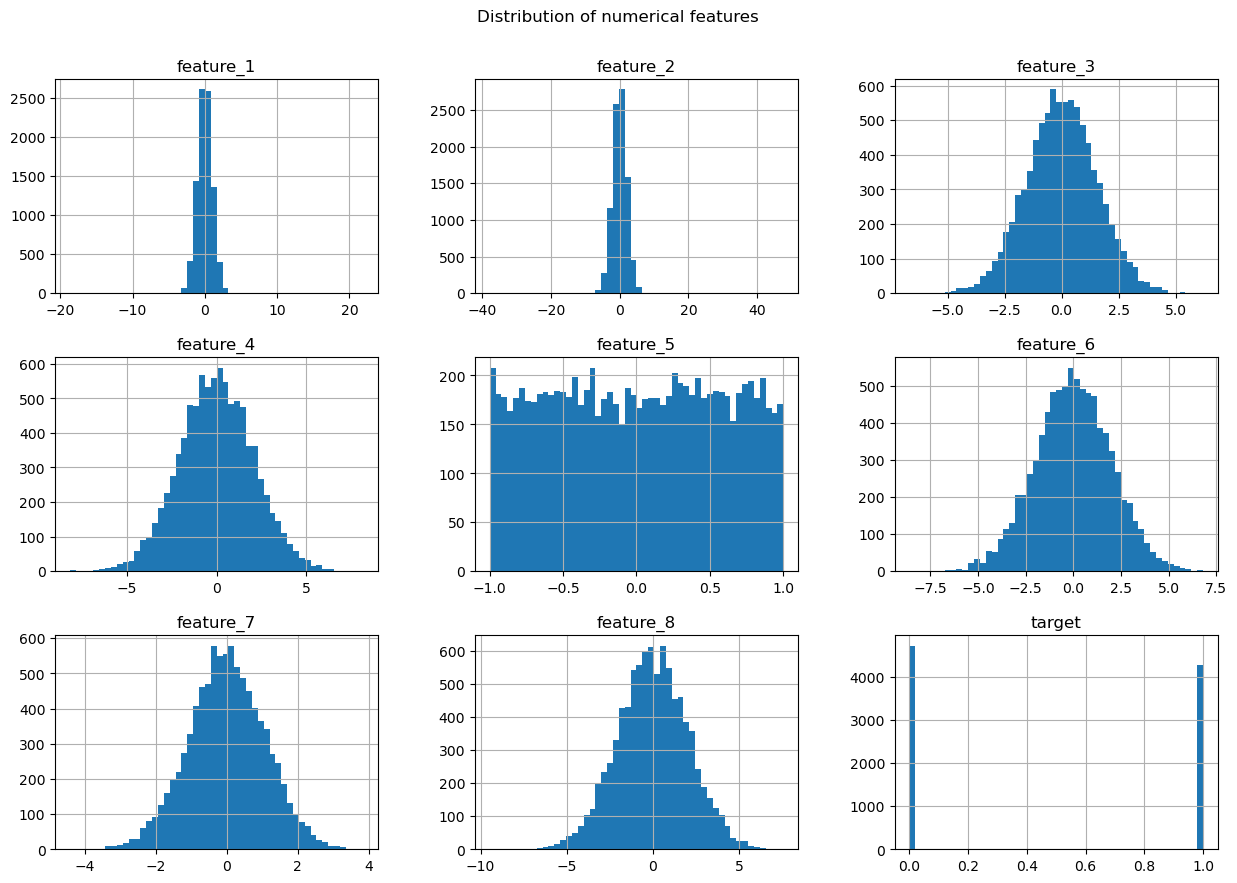

In [7]:
#Histograms of numerical features
df[numerical_columns].hist(bins=50, figsize=(15, 10))
plt.suptitle("Distribution of numerical features", y=0.95)
plt.show()

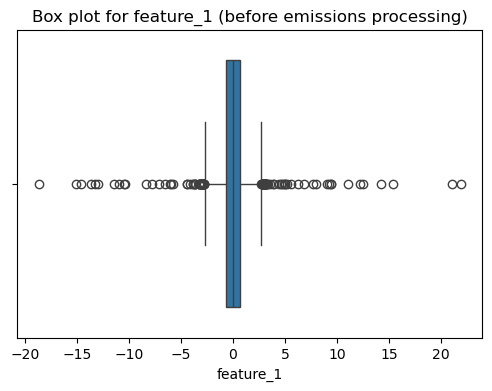

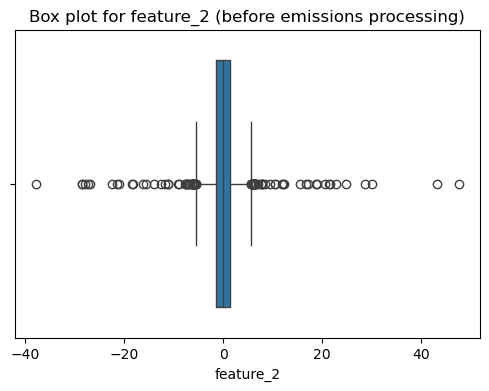

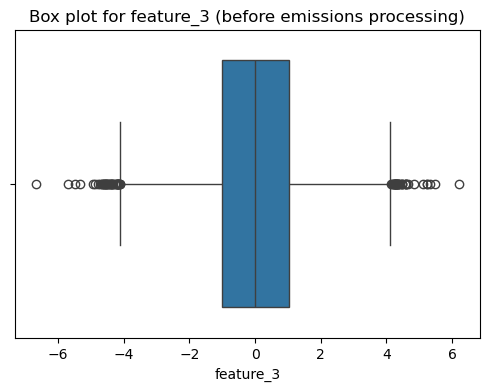

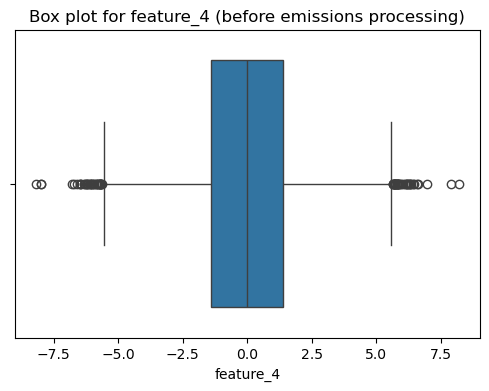

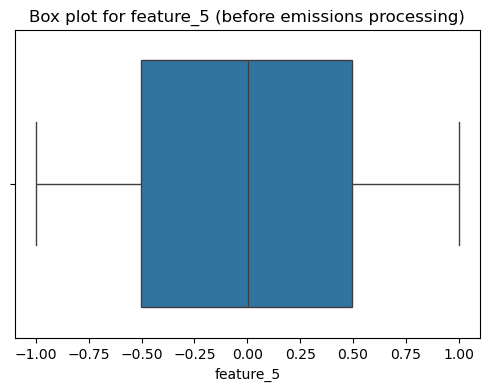

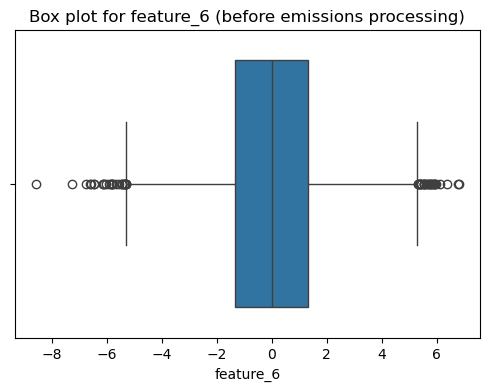

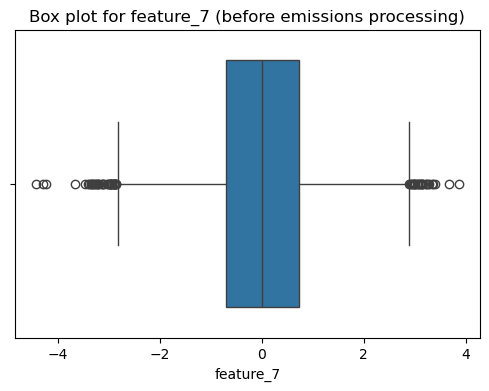

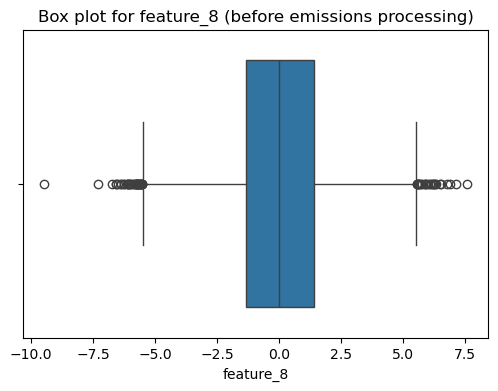

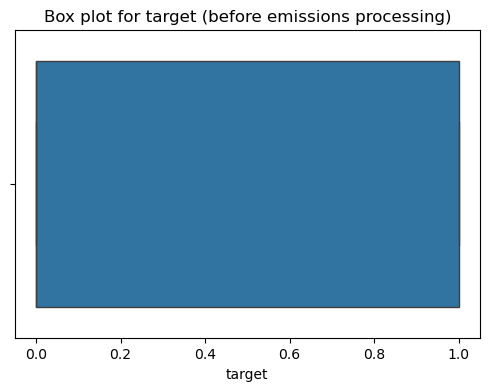

In [8]:
#Box plot for numeric features (before outlier processing)
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot for {col} (before emissions processing)")
    plt.show()

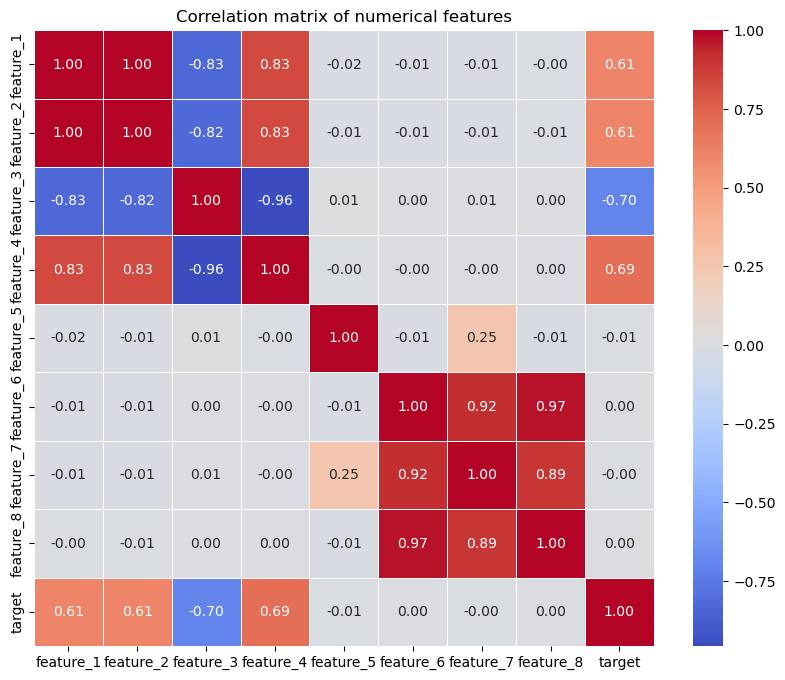

In [9]:
#Selecting only numeric columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

#Correlation matrix
corr_matrix = df[numerical_columns].corr()

#Visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix of numerical features")
plt.show()

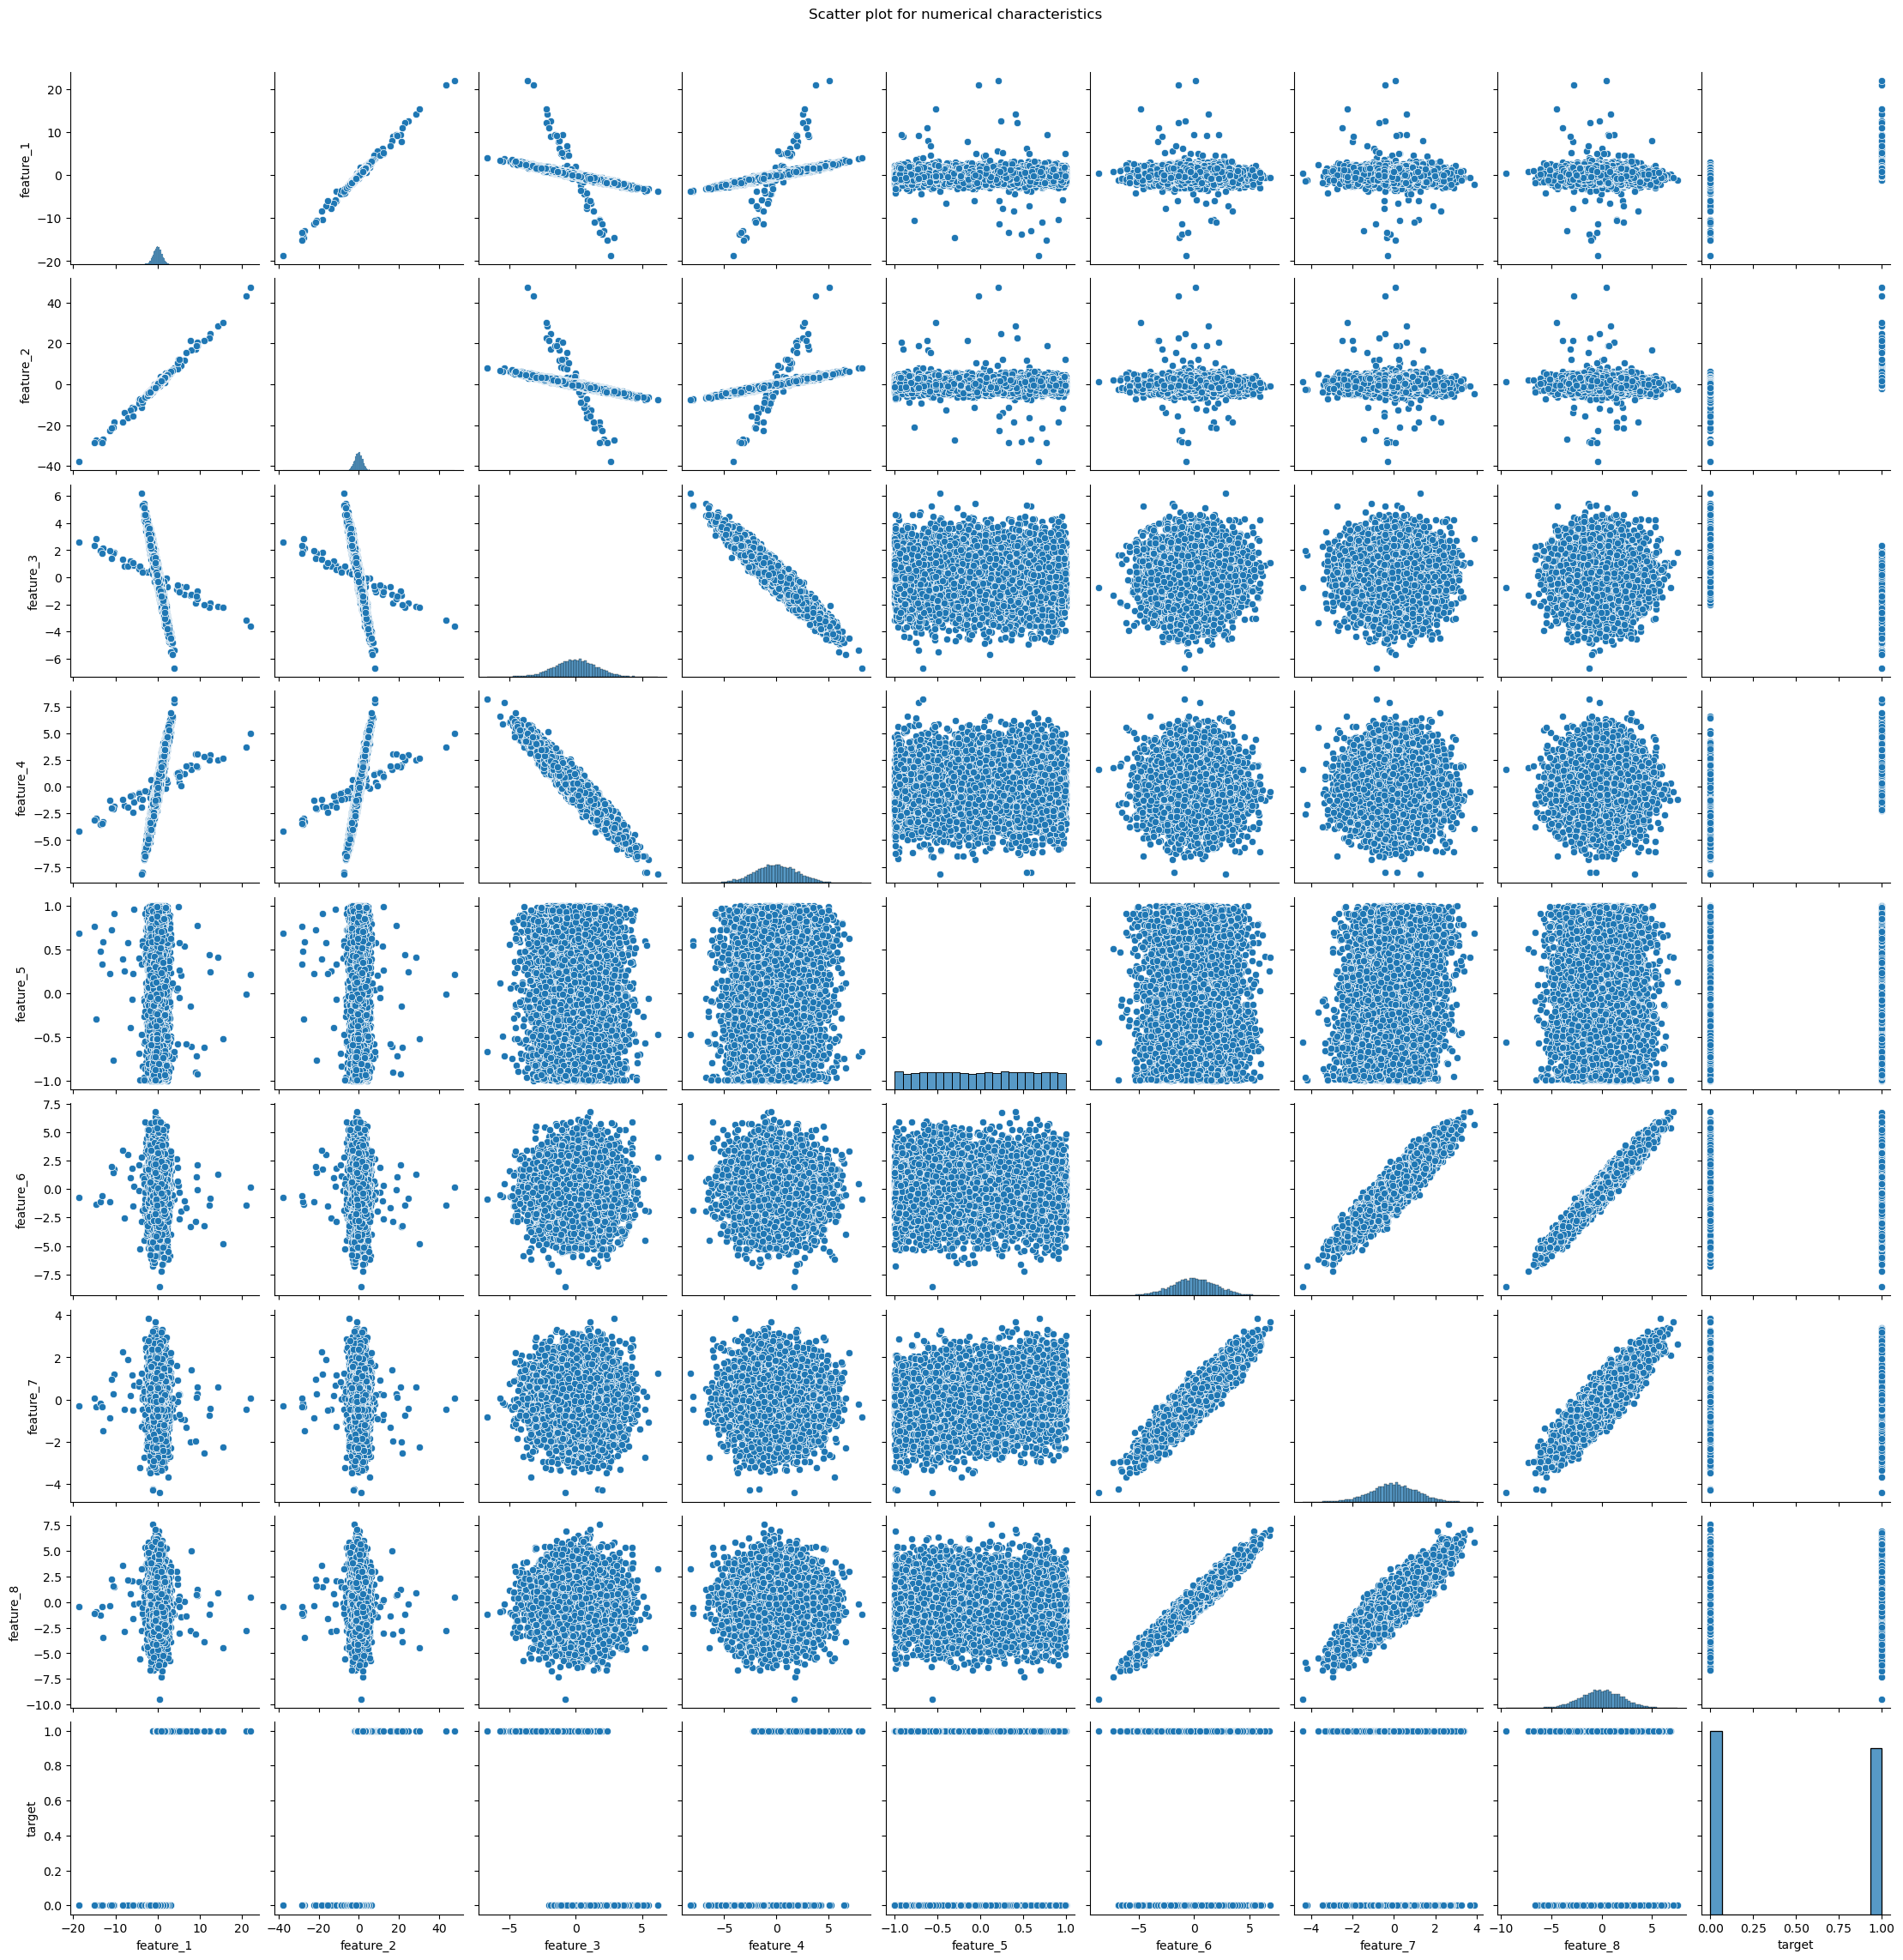

In [10]:
#Scatter Plots for all pairs of numeric features
sns.pairplot(df[numerical_columns])
plt.suptitle("Scatter plot for numerical characteristics", y=1.02)
plt.show()

In [11]:
#2.Data Preprocessing

In [12]:
#Check for gaps in data
print("Gaps in the dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Gaps in the dataset:
feature_3    400
feature_6    500
dtype: int64


In [13]:
#Handling Gaps in Numeric Data
from sklearn.impute import SimpleImputer
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
imputer_num = SimpleImputer(strategy="median")  # Replacing with median
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

In [14]:
#Check for gaps
print("\nGaps after processing:")
print(df.isnull().sum())


Gaps after processing:
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64


In [15]:
#Remove outliers from given numerical columns
def remove_outliers_iqr(df,columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25) # 1st quartile
        Q3 = cleaned_df[col].quantile(0.75) # 3rd quartile
        IQR = Q3 - Q1  # Interquartile range
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Removing outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

df_cleaned = remove_outliers_iqr(df,numerical_columns)

In [16]:
print("Before removal:", df.shape)
print("After removal:", df_cleaned.shape)

Before removal: (9000, 11)
After removal: (8669, 11)


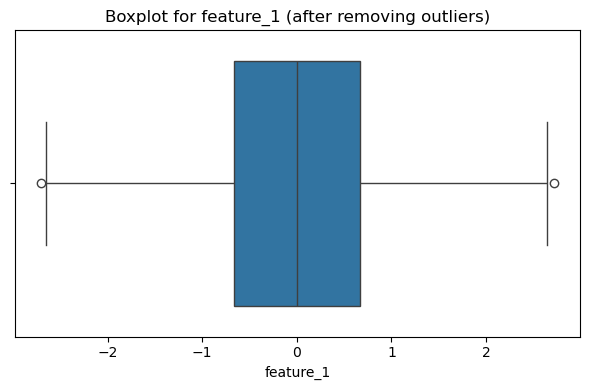

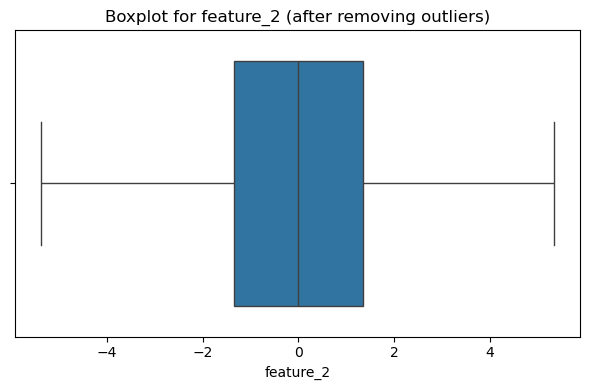

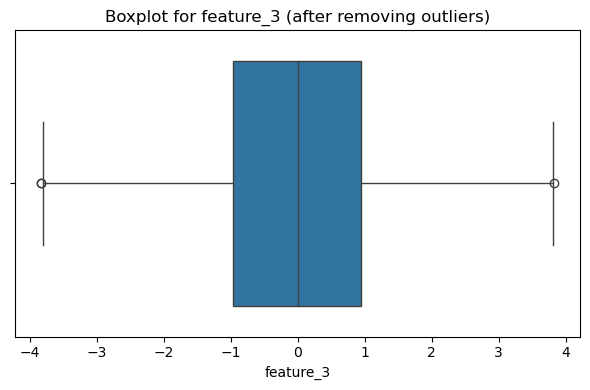

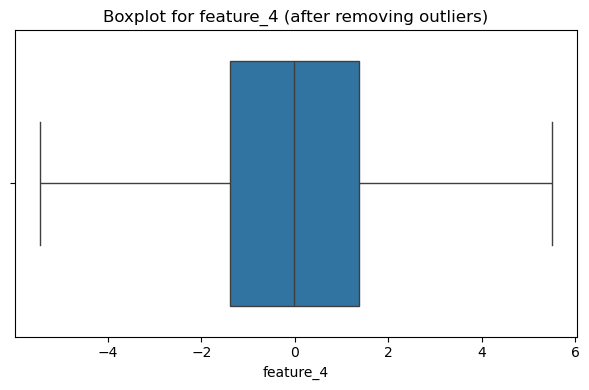

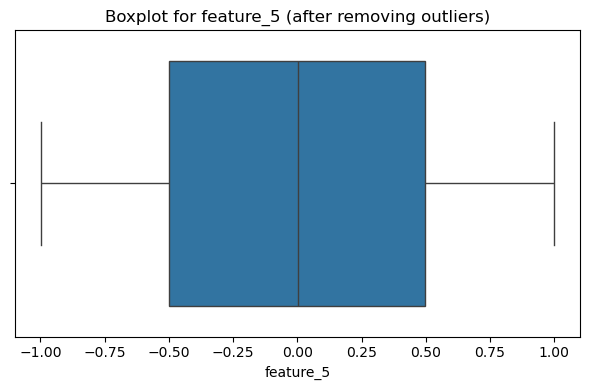

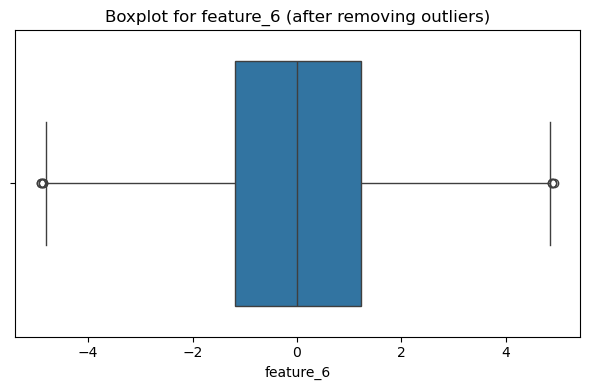

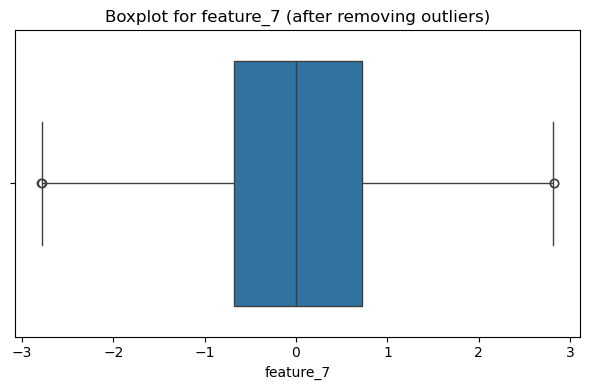

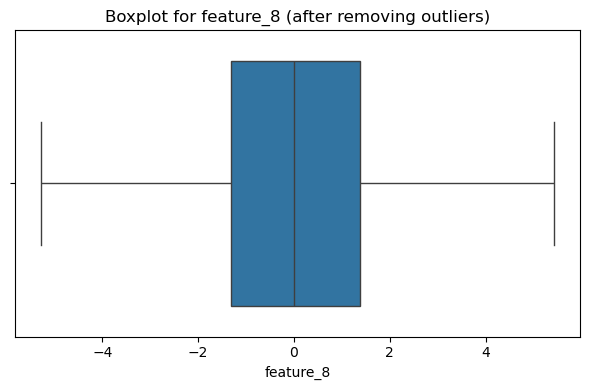

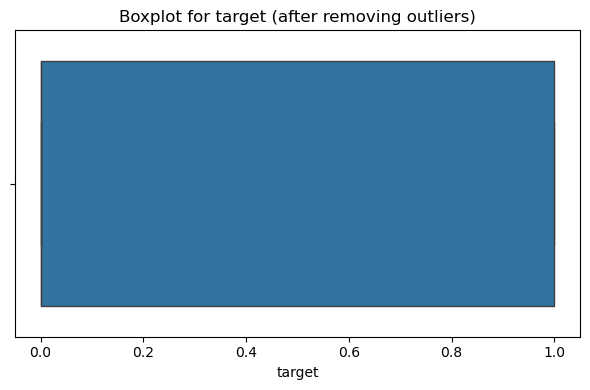

In [17]:
#Checking boxplots for all numerical features in cleaned data
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot for {col} (after removing outliers)")
    plt.tight_layout()
    plt.show()

In [18]:
#Defining categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['category_1', 'category_2'], dtype='object')


In [19]:
#One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['category_1', 'category_2'], drop_first=True)
print(df_encoded.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8  target  category_1_Below Average  category_1_High  \
0  -1.300105  -2.242241     1.0                     False            False   
1  -1.339227  -1.942298     0.0                      True            False   
2   1.190238   1.503559     1.0                     False             True   
3   2.120913   3.409035     1.0                     False             True   
4   0.935759  -0.401463     0.0                      True            False   

   category_1_Low  category_2_Region B  category_2_Region C  
0           False                False    

In [20]:
#Normalize (standardize) numerical features
from sklearn.preprocessing import StandardScaler
numerical_columns = [col for col in df_encoded.select_dtypes(include=["float64", "int64"]).columns
                     if col != 'target']
#Standardize the selected numerical columns within df_encoded
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
#Display the first few rows after standardization
print(df_encoded.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.518009   0.593722  -0.455144   0.428411   1.363756  -1.222596   
1  -0.144373  -0.033278   0.002307   0.209292   1.224748  -1.381927   
2   0.675499   0.722721  -0.536041   0.875218  -0.429068   1.073018   
3   1.588618   1.377788  -1.723920   1.355474   1.532275   1.893779   
4  -0.244401  -0.260315   0.401806  -0.222283   1.061787   0.111482   

   feature_7  feature_8  target  category_1_Below Average  category_1_High  \
0  -1.287604  -1.173168     1.0                     False            False   
1  -1.326097  -1.017482     0.0                      True            False   
2   1.162679   0.771098     1.0                     False             True   
3   2.078383   1.760140     1.0                     False             True   
4   0.912294  -0.217708     0.0                      True            False   

   category_1_Low  category_2_Region B  category_2_Region C  
0           False                False    

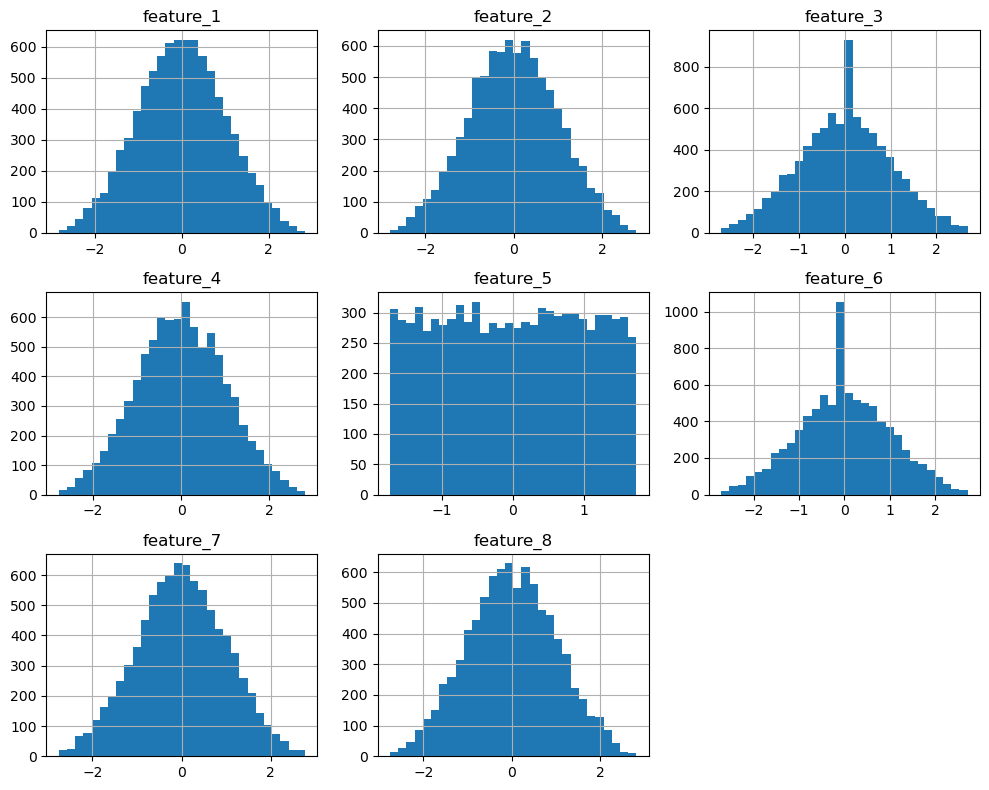

In [21]:
#Plotting histograms for numerical columns in the processed dataset
df_encoded[numerical_columns].hist(bins=30, figsize=(10, 8))

#Show the plot
plt.tight_layout()
plt.show()

In [22]:
df_encoded.head(10)

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    0.518009   0.593722  -0.455144   0.428411   1.363756  -1.222596   
1   -0.144373  -0.033278   0.002307   0.209292   1.224748  -1.381927   
2    0.675499   0.722721  -0.536041   0.875218  -0.429068   1.073018   
3    1.588618   1.377788  -1.723920   1.355474   1.532275   1.893779   
4   -0.244401  -0.260315   0.401806  -0.222283   1.061787   0.111482   
5   -0.244384  -0.364105   0.186889  -0.355580   1.220605  -0.188197   
6    1.647226   1.616656  -2.020258   1.694261   1.501971   1.122077   
7    0.800413   0.896940  -1.013110   0.723504   1.518073   0.366799   
9    0.565834   0.681014  -0.283605   0.746524  -1.285846   1.090149   
10  -0.483560  -0.446644   0.674277  -0.488782   0.665352  -1.478500   

    feature_7  feature_8  target  category_1_Below Average  category_1_High  \
0   -1.287604  -1.173168     1.0                     False            False   
1   -1.326097  -1.017482     0.0                      True            False   
2    1.162679   0.771098     1.0                     False             True   
3    2.078383   1.760140     1.0                     False             True   
4    0.912294  -0.217708     0.0                      True            False   
5    0.438243  -0.438439     0.0                      True            False   
6    1.498498   0.910356     1.0                     False             True   
7    0.791442   0.763976     1.0                     False             True   
9    0.416605   1.708417     1.0                     False             True   
10  -1.013133  -1.149353     0.0                      True            False   

    category_1_Low  category_2_Region B  category_2_Region C  
0            False                False                 True  
1            False                False                False  
2            False                False                 True  
3            False                 True                False  
4            False                False                 True  
5            False                False                False  
6            False                False                False  
7            False                False                False  
9            False                False                 True  
10           False                 True                False

In [23]:
df_encoded.to_csv('Cleaned_Data.csv', index=False)
from IPython.display import FileLink
FileLink(r'Cleaned_Data.csv')

C:\Users\User\Downloads\Moldobaeva_A_ML_Project\Cleaned_Data.csv

In [24]:
#3. Exploratory Data Analysis (EDA)

In [25]:
df_encoded = pd.read_csv('Cleaned_Data.csv')
print(df_encoded.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.518009   0.593722  -0.455144   0.428411   1.363756  -1.222596   
1  -0.144373  -0.033278   0.002307   0.209292   1.224748  -1.381927   
2   0.675499   0.722721  -0.536041   0.875218  -0.429068   1.073018   
3   1.588618   1.377788  -1.723920   1.355474   1.532275   1.893779   
4  -0.244401  -0.260315   0.401806  -0.222283   1.061787   0.111482   

   feature_7  feature_8  target  category_1_Below Average  category_1_High  \
0  -1.287604  -1.173168     1.0                     False            False   
1  -1.326097  -1.017482     0.0                      True            False   
2   1.162679   0.771098     1.0                     False             True   
3   2.078383   1.760140     1.0                     False             True   
4   0.912294  -0.217708     0.0                      True            False   

   category_1_Low  category_2_Region B  category_2_Region C  
0           False                False    

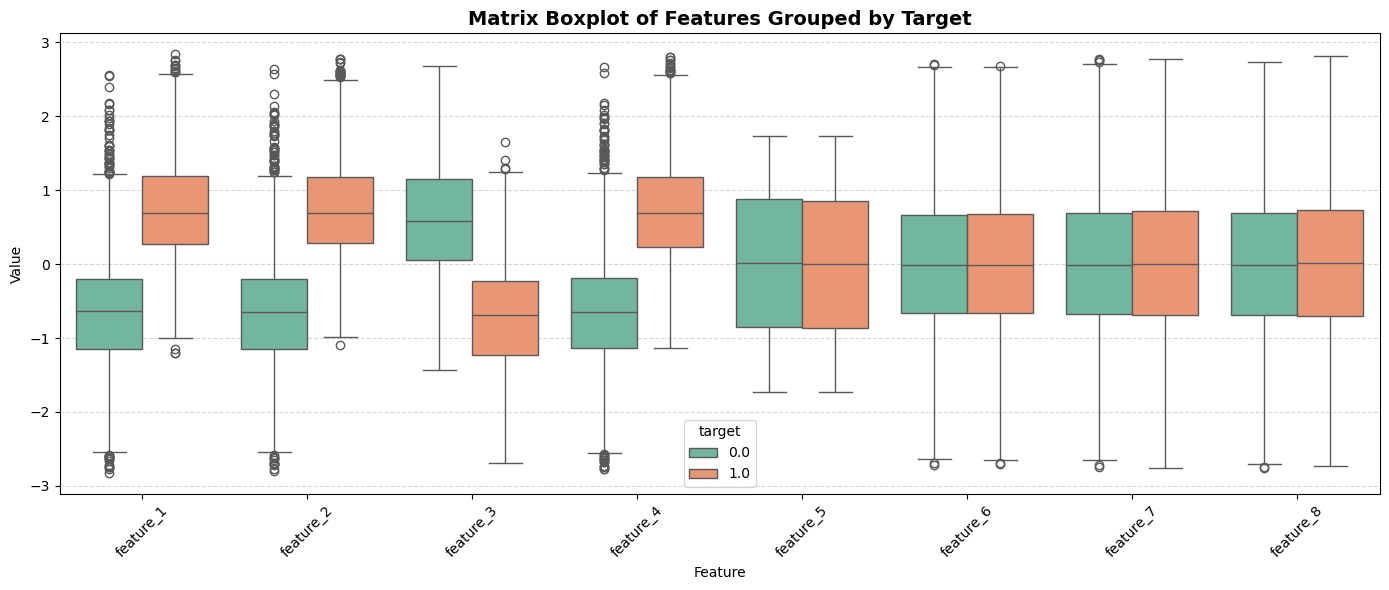

In [66]:
#boxplot which shows the distribution of all numerical features relative to the target variable target
numerical_columns = df_encoded.select_dtypes(include=["float64", "int64"]).columns.drop('target')
df_melted = df_encoded.melt(id_vars='target', value_vars=numerical_columns, var_name='Feature', value_name='Value')
plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', hue='target', data=df_melted, palette='Set2')
plt.title('Matrix Boxplot of Features Grouped by Target', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1832\1892296819.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='Feature', data=mean_vals, palette='Set2')


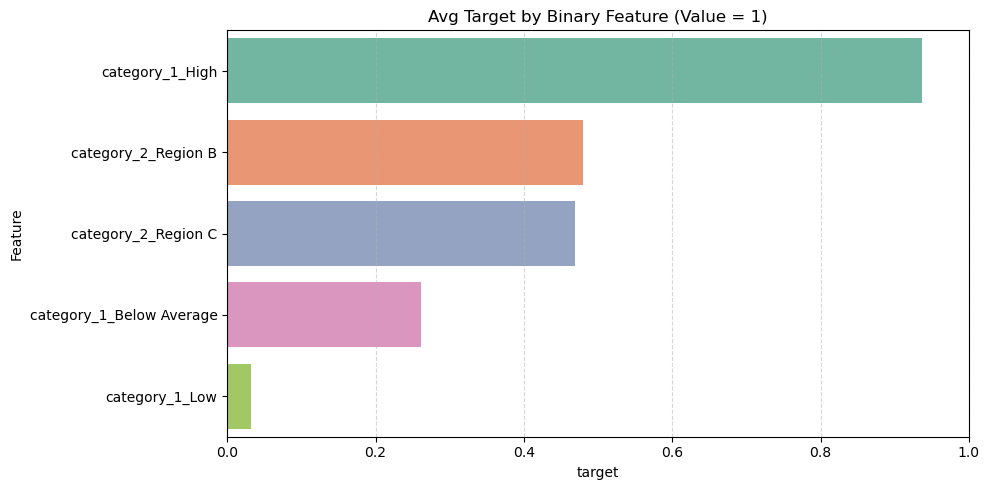

In [70]:
#Horizontal barplot showing how each binary feature affects the probability that the target variable is equal to 1
binary_cols = [c for c in df_encoded.columns if c.startswith('category_1_') or c.startswith('category_2_')]
df_encoded[binary_cols] = df_encoded[binary_cols].astype(int)
#Average target values at value=1
mean_vals = df_encoded[binary_cols + ['target']].melt(id_vars='target', var_name='Feature')
mean_vals = mean_vals[mean_vals['value'] == 1].groupby('Feature')['target'].mean().reset_index()
mean_vals = mean_vals.sort_values('target', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='target', y='Feature', data=mean_vals, palette='Set2')
plt.title('Avg Target by Binary Feature (Value = 1)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

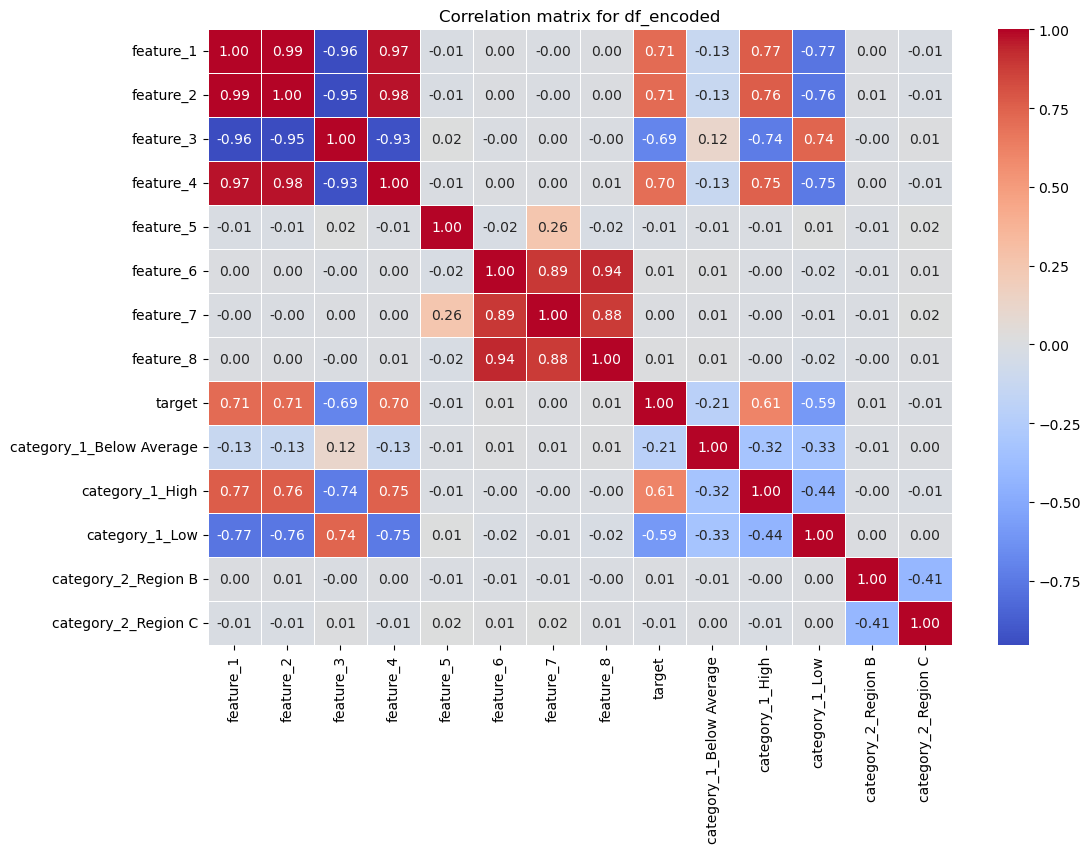

In [28]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix for df_encoded")
plt.show()

In [29]:
from scipy.stats import ttest_ind
#Select numeric columns excluding 'target'
numerical_columns = df_encoded.select_dtypes(include=["float64", "int64"]).drop(columns='target').columns
#Perform t-tests and collect results
t_test_results = pd.DataFrame([
    {
        'feature': col,
        't_statistic': round((t_stat := ttest_ind(
            df_encoded[df_encoded['target'] == 0][col],
            df_encoded[df_encoded['target'] == 1][col],
            equal_var=False
        )[0]), 4),
        'p_value': format(ttest_ind(
            df_encoded[df_encoded['target'] == 0][col],
            df_encoded[df_encoded['target'] == 1][col],
            equal_var=False
        )[1], '.4e')
    }
    for col in numerical_columns
])
#Sort and display results by p-value
print(t_test_results.sort_values(by='p_value'))

     feature  t_statistic     p_value
0  feature_1     -94.2060  0.0000e+00
1  feature_2     -95.1465  0.0000e+00
2  feature_3      89.6765  0.0000e+00
3  feature_4     -91.6341  0.0000e+00
7  feature_8      -1.0621  2.8822e-01
4  feature_5       0.9378  3.4837e-01
5  feature_6      -0.7573  4.4889e-01
6  feature_7      -0.3025  7.6230e-01


In [30]:
from scipy.stats import chi2_contingency
#Select binary categorical features (one-hot encoded)
binary_columns = [col for col in df_encoded.columns 
                  if col.startswith('category_1_') or col.startswith('category_2_')]

#Chi-square tests
chi2_df = pd.DataFrame([
    {
        'Feature': col,
        'Chi2 Statistic': round((stat := chi2_contingency(pd.crosstab(df_encoded[col], df_encoded['target'])))[0], 4),
        'p-value': format(stat[1], '.4e')
    }
    for col in binary_columns
])
print(chi2_df.sort_values(by='p-value'))

                    Feature  Chi2 Statistic     p-value
1           category_1_High       3225.8919  0.0000e+00
2            category_1_Low       3049.1399  0.0000e+00
4       category_2_Region C          0.4402  5.0702e-01
3       category_2_Region B          0.3173  5.7322e-01
0  category_1_Below Average        380.8968  7.9382e-85


In [31]:
columns_to_drop = ['feature_5', 'feature_6', 'feature_7', 'category_2_Region B', 'category_2_Region C']
df_removed = df_encoded.drop(columns=columns_to_drop)

In [32]:
print(df_removed.head())

   feature_1  feature_2  feature_3  feature_4  feature_8  target  \
0   0.518009   0.593722  -0.455144   0.428411  -1.173168     1.0   
1  -0.144373  -0.033278   0.002307   0.209292  -1.017482     0.0   
2   0.675499   0.722721  -0.536041   0.875218   0.771098     1.0   
3   1.588618   1.377788  -1.723920   1.355474   1.760140     1.0   
4  -0.244401  -0.260315   0.401806  -0.222283  -0.217708     0.0   

   category_1_Below Average  category_1_High  category_1_Low  
0                     False            False           False  
1                      True            False           False  
2                     False             True           False  
3                     False             True           False  
4                      True            False           False  


In [33]:
#4.Feature Engineering

In [34]:
#Сreate a new feature
#Sums, averages, differences, ratios
df_removed['feature_sum'] = df_removed[['feature_1', 'feature_2']].sum(axis=1)
df_removed['total_features'] = df_removed[['feature_1', 'feature_2', 'feature_3', 'feature_4']].sum(axis=1)
df_removed['mean_features'] = df_removed[['feature_1', 'feature_2', 'feature_3', 'feature_4']].mean(axis=1)
df_removed['diff_f1_f2'] = df_removed['feature_1'] - df_removed['feature_2']

#Statistics based on absolute values
df_removed['mean_abs'] = df_removed[['feature_1', 'feature_2', 'feature_3', 'feature_4']].abs().mean(axis=1)
df_removed['max_feature'] = df_removed[['feature_1', 'feature_2', 'feature_3', 'feature_4']].max(axis=1)
df_removed['min_feature'] = df_removed[['feature_1', 'feature_2', 'feature_3', 'feature_4']].min(axis=1)

#Features based on feature_1 and feature_4
df_removed['f1_f4_sum'] = df_removed['feature_1'] + df_removed['feature_4']
df_removed['f1_f4_diff'] = df_removed['feature_1'] - df_removed['feature_4']

#Absolute statistics for feature_1 and feature_4
df_removed['f1_f4_max'] = df_removed[['feature_1', 'feature_4']].max(axis=1)
df_removed['f1_f4_min'] = df_removed[['feature_1', 'feature_4']].min(axis=1)

In [35]:
print(df_removed.head())

   feature_1  feature_2  feature_3  feature_4  feature_8  target  \
0   0.518009   0.593722  -0.455144   0.428411  -1.173168     1.0   
1  -0.144373  -0.033278   0.002307   0.209292  -1.017482     0.0   
2   0.675499   0.722721  -0.536041   0.875218   0.771098     1.0   
3   1.588618   1.377788  -1.723920   1.355474   1.760140     1.0   
4  -0.244401  -0.260315   0.401806  -0.222283  -0.217708     0.0   

   category_1_Below Average  category_1_High  category_1_Low  feature_sum  \
0                     False            False           False     1.111731   
1                      True            False           False    -0.177652   
2                     False             True           False     1.398220   
3                     False             True           False     2.966406   
4                      True            False           False    -0.504716   

   total_features  mean_features  diff_f1_f2  mean_abs  max_feature  \
0        1.084998       0.271250   -0.075713  0.498822   

In [36]:
from scipy.stats import ttest_ind

#Split the data into classes based on the target variable
group_0 = df_removed[df_removed['target'] == 0]
group_1 = df_removed[df_removed['target'] == 1]

#List of new features to perform the t-test on
new_features = [
    'feature_sum', 'total_features', 'mean_features',
    'diff_f1_f2', 'mean_abs', 'max_feature', 'min_feature',
    'f1_f4_sum', 'f1_f4_diff', 'f1_f4_max', 'f1_f4_min'
]

#Compute the t-statistic and p-value for each feature
results = []
for feature in new_features:
    stat, p = ttest_ind(group_0[feature], group_1[feature], equal_var=False)
    results.append({'feature': feature, 't_statistic': stat, 'p_value': p})

#Create a DataFrame and sort by p-value
results_df = pd.DataFrame(results).sort_values(by='p_value')
print(results_df)

           feature  t_statistic       p_value
0      feature_sum   -94.956038  0.000000e+00
1   total_features   -91.187939  0.000000e+00
2    mean_features   -91.187939  0.000000e+00
7        f1_f4_sum   -94.269297  0.000000e+00
10       f1_f4_min   -93.740966  0.000000e+00
9        f1_f4_max   -93.717076  0.000000e+00
5      max_feature   -10.381842  4.210506e-25
8       f1_f4_diff    -3.762710  1.692023e-04
6      min_feature    -3.365853  7.664169e-04
3       diff_f1_f2     3.002100  2.688981e-03
4         mean_abs    -2.308348  2.100346e-02


In [37]:
#List of features to remove
features_to_remove = ['mean_abs']

#Drop the features from the DataFrame
df_removed = df_removed.drop(columns=features_to_remove)
df_removed.head()

feature_1  feature_2  feature_3  feature_4  feature_8  target  \
0   0.518009   0.593722  -0.455144   0.428411  -1.173168     1.0   
1  -0.144373  -0.033278   0.002307   0.209292  -1.017482     0.0   
2   0.675499   0.722721  -0.536041   0.875218   0.771098     1.0   
3   1.588618   1.377788  -1.723920   1.355474   1.760140     1.0   
4  -0.244401  -0.260315   0.401806  -0.222283  -0.217708     0.0   

   category_1_Below Average  category_1_High  category_1_Low  feature_sum  \
0                     False            False           False     1.111731   
1                      True            False           False    -0.177652   
2                     False             True           False     1.398220   
3                     False             True           False     2.966406   
4                      True            False           False    -0.504716   

   total_features  mean_features  diff_f1_f2  max_feature  min_feature  \
0        1.084998       0.271250   -0.075713     0.593722    -0.455144   
1        0.033948       0.008487   -0.111095     0.209292    -0.144373   
2        1.737397       0.434349   -0.047222     0.875218    -0.536041   
3        2.597961       0.649490    0.210829     1.588618    -1.723920   
4       -0.325194      -0.081298    0.015914     0.401806    -0.260315   

   f1_f4_sum  f1_f4_diff  f1_f4_max  f1_f4_min  
0   0.946420    0.089598   0.518009   0.428411  
1   0.064919   -0.353666   0.209292  -0.144373  
2   1.550717   -0.199719   0.875218   0.675499  
3   2.944092    0.233144   1.588618   1.355474  
4  -0.466684   -0.022117  -0.222283  -0.244401

In [38]:
#Save the final dataset
df_removed.to_csv('Final_Data.csv', index=False)

#Generate a download link
from IPython.display import FileLink
FileLink(r'Final_Data.csv')

C:\Users\User\Downloads\Moldobaeva_A_ML_Project\Final_Data.csv

In [39]:
#5.Moddeling

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
#Load the data
df = pd.read_csv('Final_Data.csv')

#Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Predict on the test set
rf_pred = rf_model.predict(X_test)

#Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

#ROC AUC score
rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_proba)
print(f"Random Forest ROC AUC Score: {rf_roc_auc:.4f}")

Random Forest Accuracy: 0.8708

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       889
         1.0       0.88      0.85      0.86       845

    accuracy                           0.87      1734
   macro avg       0.87      0.87      0.87      1734
weighted avg       0.87      0.87      0.87      1734

Random Forest ROC AUC Score: 0.9455


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

#Make predictions on the test set
gb_pred = gb_model.predict(X_test)

#Evaluate accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.4f}')

#Classification report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, gb_pred))

#ROC AUC score
gb_proba = gb_model.predict_proba(X_test)[:, 1]
gb_roc_auc = roc_auc_score(y_test, gb_proba)
print(f"Gradient Boosting ROC AUC Score: {gb_roc_auc:.4f}")

Gradient Boosting Accuracy: 0.8737

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       889
         1.0       0.89      0.84      0.87       845

    accuracy                           0.87      1734
   macro avg       0.87      0.87      0.87      1734
weighted avg       0.87      0.87      0.87      1734

Gradient Boosting ROC AUC Score: 0.9518


In [42]:
from sklearn.ensemble import AdaBoostClassifier
#Train the AdaBoost model
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

#Make predictions on the test set
ab_pred = ab_model.predict(X_test)

#Evaluate accuracy
ab_accuracy = accuracy_score(y_test, ab_pred)
print(f'AdaBoost Accuracy: {ab_accuracy:.4f}')

#Classification report
print("\nClassification Report for AdaBoost:")
print(classification_report(y_test, ab_pred))

#ROC AUC score
ab_proba = ab_model.predict_proba(X_test)[:, 1]
ab_roc_auc = roc_auc_score(y_test, ab_proba)
print(f"AdaBoost ROC AUC Score: {ab_roc_auc:.4f}")

AdaBoost Accuracy: 0.8749

Classification Report for AdaBoost:
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       889
         1.0       0.91      0.83      0.87       845

    accuracy                           0.87      1734
   macro avg       0.88      0.87      0.87      1734
weighted avg       0.88      0.87      0.87      1734

AdaBoost ROC AUC Score: 0.9480


In [43]:
from sklearn.linear_model import LogisticRegression
#Create the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

#Make predictions on the test set
logreg_pred = logreg_model.predict(X_test)

#Evaluate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')

#Classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

#ROC AUC score
logreg_proba = logreg_model.predict_proba(X_test)[:, 1]
logreg_roc_auc = roc_auc_score(y_test, logreg_proba)
print(f"Logistic Regression ROC AUC Score: {logreg_roc_auc:.4f}")

Logistic Regression Accuracy: 0.8489

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       889
         1.0       0.85      0.84      0.84       845

    accuracy                           0.85      1734
   macro avg       0.85      0.85      0.85      1734
weighted avg       0.85      0.85      0.85      1734

Logistic Regression ROC AUC Score: 0.9258


In [44]:
from sklearn.svm import SVC
#Create the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

#Make predictions on the test set
svm_pred = svm_model.predict(X_test)

#Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

#Classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))

#ROC AUC score
svm_proba = svm_model.predict_proba(X_test)[:, 1]
svm_roc_auc = roc_auc_score(y_test, svm_proba)
print(f"SVM ROC AUC Score: {svm_roc_auc:.4f}")

SVM Accuracy: 0.8581

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       889
         1.0       0.85      0.87      0.86       845

    accuracy                           0.86      1734
   macro avg       0.86      0.86      0.86      1734
weighted avg       0.86      0.86      0.86      1734

SVM ROC AUC Score: 0.9372


In [45]:
from sklearn.neighbors import KNeighborsClassifier
#Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make predictions on the test set
knn_pred = knn_model.predict(X_test)

#Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {knn_accuracy:.4f}')

#Classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_pred))

#ROC AUC score
knn_proba = knn_model.predict_proba(X_test)[:, 1]
knn_roc_auc = roc_auc_score(y_test, knn_proba)
print(f"KNN ROC AUC Score: {knn_roc_auc:.4f}")

KNN Accuracy: 0.8622

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       889
         1.0       0.87      0.84      0.86       845

    accuracy                           0.86      1734
   macro avg       0.86      0.86      0.86      1734
weighted avg       0.86      0.86      0.86      1734

KNN ROC AUC Score: 0.9261


In [46]:
from sklearn.model_selection import cross_val_score
#Create models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

#Apply cross-validation and print Accuracy and ROC AUC
for name, model in models.items():
    acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    
    print(f'{name}')
    print(f'  Mean Accuracy : {acc_scores.mean():.4f} (std: {acc_scores.std():.4f})')
    print(f'  Mean ROC AUC  : {auc_scores.mean():.4f} (std: {auc_scores.std():.4f})\n')

Logistic Regression
  Mean Accuracy : 0.8537 (std: 0.0068)
  Mean ROC AUC  : 0.9334 (std: 0.0027)

SVM
  Mean Accuracy : 0.8643 (std: 0.0073)
  Mean ROC AUC  : 0.9411 (std: 0.0052)

Random Forest
  Mean Accuracy : 0.8752 (std: 0.0069)
  Mean ROC AUC  : 0.9515 (std: 0.0030)

Gradient Boosting
  Mean Accuracy : 0.8791 (std: 0.0079)
  Mean ROC AUC  : 0.9573 (std: 0.0032)

AdaBoost
  Mean Accuracy : 0.8793 (std: 0.0081)
  Mean ROC AUC  : 0.9515 (std: 0.0031)

KNN
  Mean Accuracy : 0.8595 (std: 0.0080)
  Mean ROC AUC  : 0.9259 (std: 0.0046)



In [47]:
import joblib
#Save Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')
#Save Gradient Boosting model
joblib.dump(gb_model, 'gb_model.pkl')
#Save AdaBoost model
joblib.dump(ab_model, 'ab_model.pkl')
print("All models saved as .pkl files.")

All models saved as .pkl files.


In [48]:
#6. Model Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
#Hyperparameters Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}
#Grid search with cross-validation
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
#Fit and evaluate
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

#Results
print("Best Hyperparameters:", grid_search_rf.best_params_)
print(f"CV Accuracy: {grid_search_rf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score for Best Random Forest Model: {roc_auc_score(y_test, y_proba):.4f}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
CV Accuracy: 0.8818
Test Accuracy: 0.8743

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       889
         1.0       0.89      0.84      0.87       845

    accuracy                           0.87      1734
   macro avg       0.88      0.87      0.87      1734
weighted avg       0.88      0.87      0.87      1734

ROC AUC Score for Best Random Forest Model: 0.9509


In [50]:
#Hyperparameters Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}
#Grid search with 3-fold CV
grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
#Fit and evaluate
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
y_pred = best_gb_model.predict(X_test)
y_proba = best_gb_model.predict_proba(X_test)[:, 1]

#Output results
print("Best Hyperparameters:", grid_search_gb.best_params_)
print(f"CV Accuracy: {grid_search_gb.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score for Best Gradient Boosting Model: {roc_auc_score(y_test, y_proba):.4f}")

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
CV Accuracy: 0.8828
Test Accuracy: 0.8789

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       889
         1.0       0.90      0.84      0.87       845

    accuracy                           0.88      1734
   macro avg       0.88      0.88      0.88      1734
weighted avg       0.88      0.88      0.88      1734

ROC AUC Score for Best Gradient Boosting Model: 0.9512


In [51]:
from sklearn.tree import DecisionTreeClassifier
#Hyperparameters AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3],
}
#Grid search with base estimator = Decision Tree
grid_search_ab = GridSearchCV(
    AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42),
    param_grid=param_grid_ab,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
#Fit and evaluate
grid_search_ab.fit(X_train, y_train)
best_ab_model = grid_search_ab.best_estimator_
y_pred = best_ab_model.predict(X_test)
y_proba = best_ab_model.predict_proba(X_test)[:, 1]

#Output results
print("Best Hyperparameters:", grid_search_ab.best_params_)
print(f"CV Accuracy: {grid_search_ab.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score for Best AdaBoost Model: {roc_auc_score(y_test, y_proba):.4f}")

Best Hyperparameters: {'estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 50}
CV Accuracy: 0.8825
Test Accuracy: 0.8829

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       889
         1.0       0.88      0.87      0.88       845

    accuracy                           0.88      1734
   macro avg       0.88      0.88      0.88      1734
weighted avg       0.88      0.88      0.88      1734

ROC AUC Score for Best AdaBoost Model: 0.9501


In [52]:
# Accuracy CV
cv_acc_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_acc_gb = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='accuracy')
cv_acc_ab = cross_val_score(best_ab_model, X_train, y_train, cv=5, scoring='accuracy')

# ROC AUC CV
cv_auc_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_auc_gb = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_auc_ab = cross_val_score(best_ab_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print summary
print("Cross-Validation (Accuracy):")
print(f"Random Forest: {cv_acc_rf.mean():.4f}")
print(f"Gradient Boosting: {cv_acc_gb.mean():.4f}")
print(f"AdaBoost: {cv_acc_ab.mean():.4f}")

print("\nCross-Validation (ROC AUC):")
print(f"Random Forest: {cv_auc_rf.mean():.4f}")
print(f"Gradient Boosting: {cv_auc_gb.mean():.4f}")
print(f"AdaBoost: {cv_auc_ab.mean():.4f}")

Cross-Validation (Accuracy):
Random Forest: 0.8818
Gradient Boosting: 0.8823
AdaBoost: 0.8776

Cross-Validation (ROC AUC):
Random Forest: 0.9558
Gradient Boosting: 0.9577
AdaBoost: 0.9545


In [53]:
#Save best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')
#Save best Gradient Boosting model
joblib.dump(best_gb_model, 'best_gb_model.pkl')
#Save best AdaBoost model
joblib.dump(best_ab_model, 'best_ab_model.pkl')
print("Best models saved successfully as .pkl files.")

Best models saved successfully as .pkl files.


In [54]:
#7. Model Interpretation

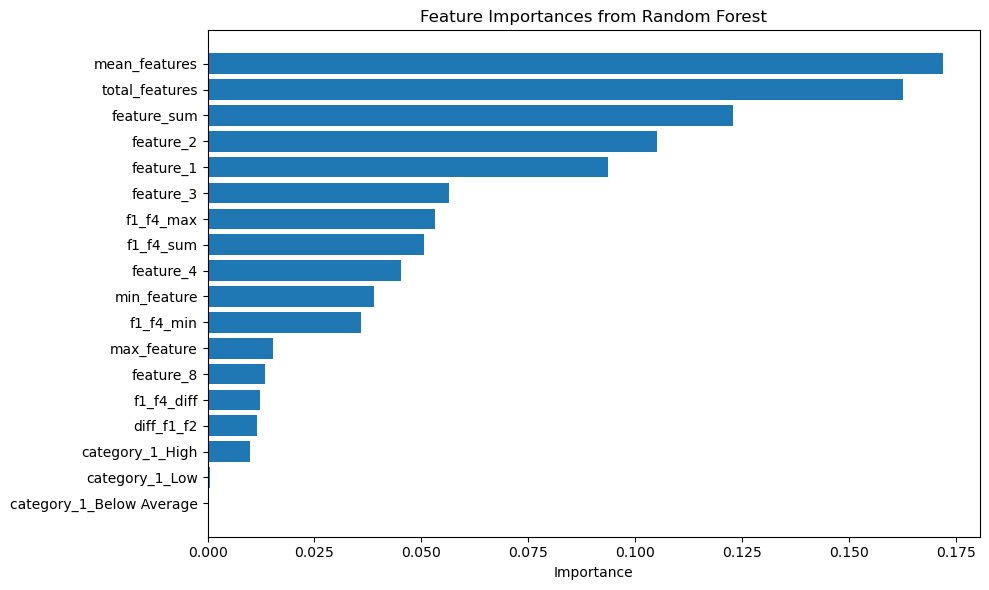

In [55]:
#Feature importances Random Forest
importances = best_rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
#Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

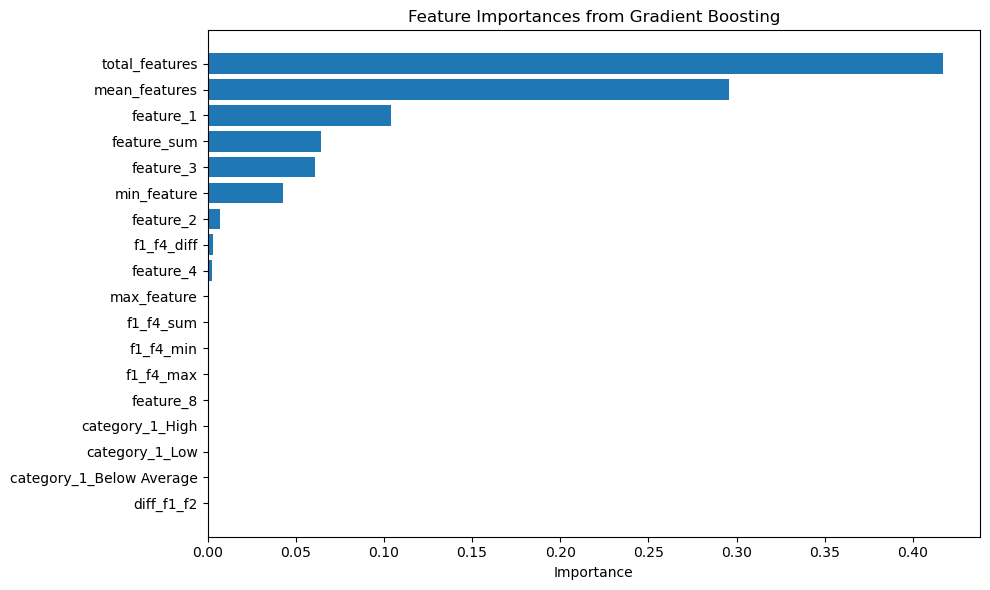

In [56]:
#Feature importances Gradient Boosting
importances_gb = best_gb_model.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb})
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)
#Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df_gb['Feature'], importance_df_gb['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

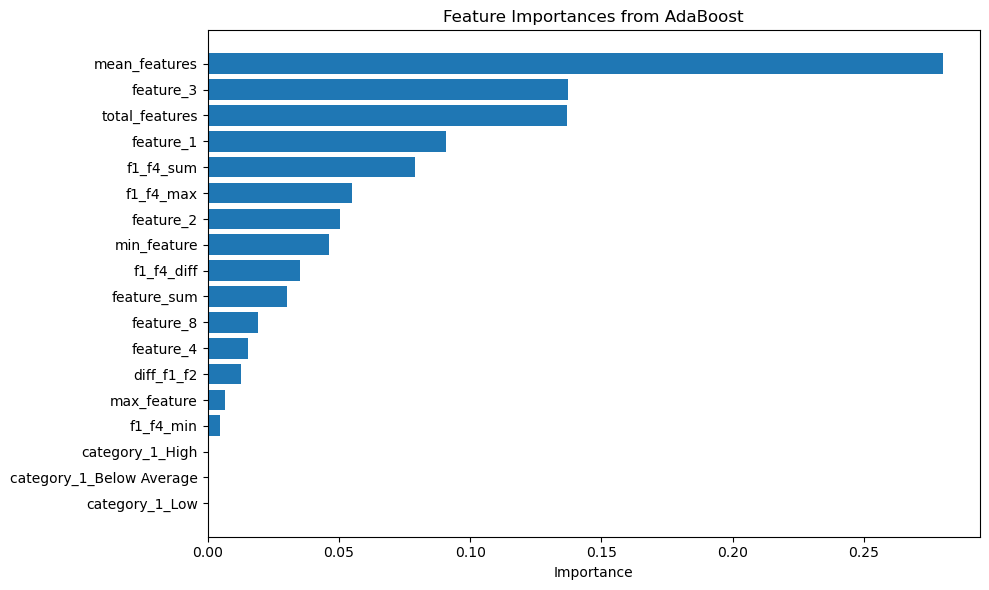

In [57]:
#Feature importances AdaBoost model
importances_ab = best_ab_model.feature_importances_

#Creating the importance table
importance_df_ab = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_ab
}).sort_values(by='Importance', ascending=False)
#Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df_ab['Feature'], importance_df_ab['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances from AdaBoost')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [58]:
print(X_test.dtypes)

feature_1                   float64
feature_2                   float64
feature_3                   float64
feature_4                   float64
feature_8                   float64
category_1_Below Average       bool
category_1_High                bool
category_1_Low                 bool
feature_sum                 float64
total_features              float64
mean_features               float64
diff_f1_f2                  float64
max_feature                 float64
min_feature                 float64
f1_f4_sum                   float64
f1_f4_diff                  float64
f1_f4_max                   float64
f1_f4_min                   float64
dtype: object


In [59]:
#Convert boolean features to float (required by SHAP)
X_explain = X_test[:100].copy()
for col in X_explain.select_dtypes(include='bool').columns:
    X_explain[col] = X_explain[col].astype(float)

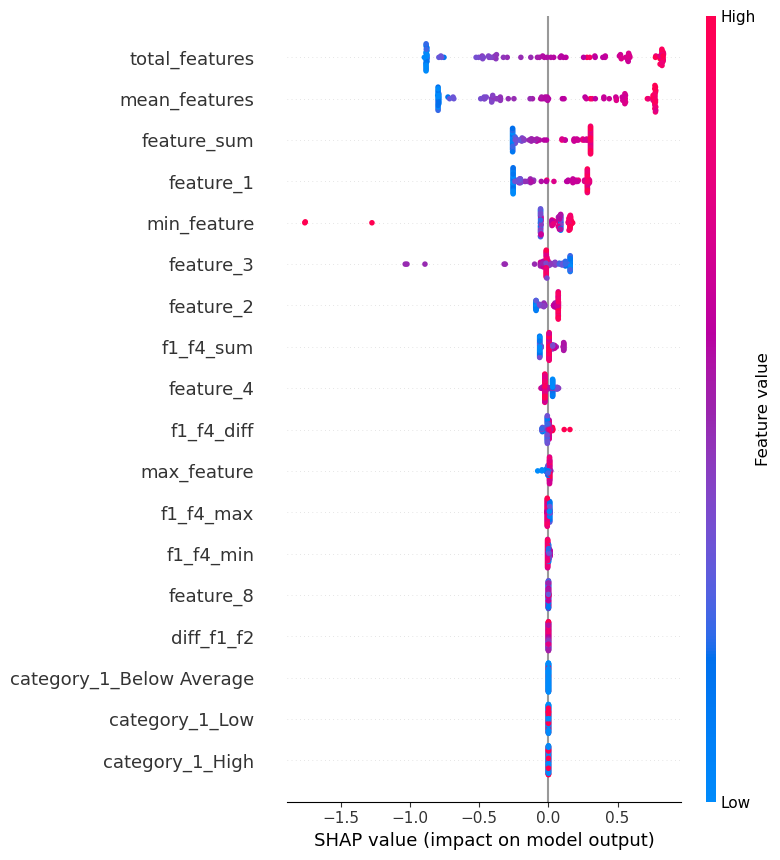

In [60]:
import shap
#Gradient Boosting SHAP
#Create SHAP explainer
#SHAP automatically detects the model type (tree-based) and uses TreeExplainer
explainer_gb = shap.Explainer(best_gb_model, X_explain)
#Compute SHAP values for the samples
#Returns an object showing the contribution of each feature to each prediction
shap_values_gb = explainer_gb(X_explain)
#Visualization (summary_plot shows feature importance and their impact on model predictions)
shap.summary_plot(shap_values_gb, X_explain)

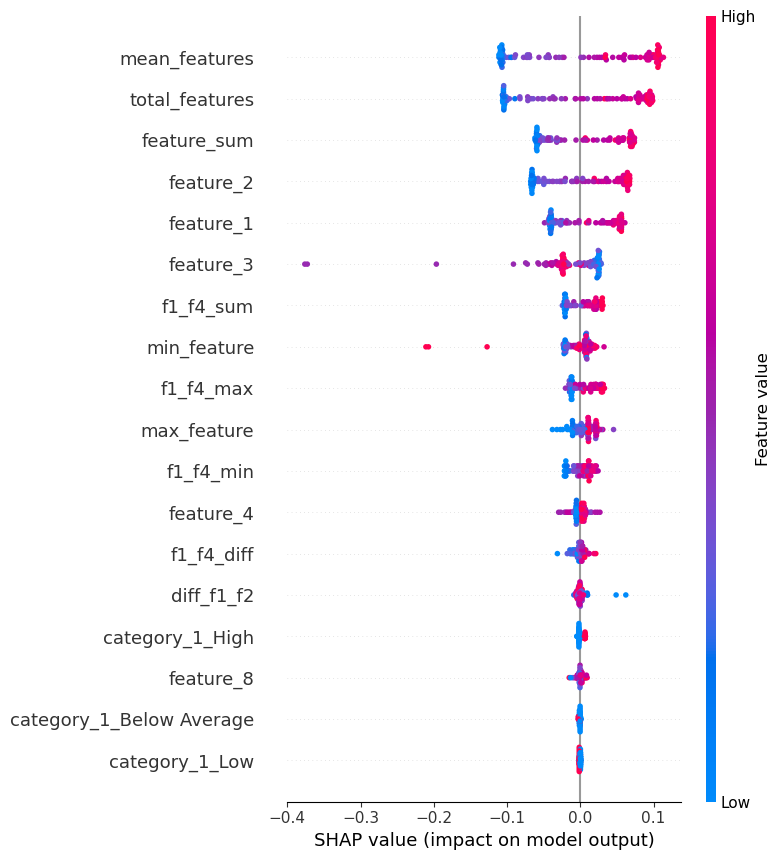

In [61]:
#Random Forest SHAP
explainer_rf = shap.TreeExplainer(best_rf_model)
shap_values_rf = explainer_rf.shap_values(X_explain)

#If a list is returned, take shap_values_rf[1]
#If a 3D array is returned (samples, features, classes), take [:, :, 1]
if isinstance(shap_values_rf, list):
    shap_values_plot = shap_values_rf[1]
elif shap_values_rf.ndim == 3 and shap_values_rf.shape[2] == 2:
    shap_values_plot = shap_values_rf[:, :, 1]
else:
    shap_values_plot = shap_values_rf

#SHAP summary plot for all features
shap.summary_plot(shap_values_plot, X_explain, max_display=X_explain.shape[1])

  0%|          | 0/100 [00:00<?, ?it/s]

shap_values_plot: (100, 18)
X_explain: (100, 18)


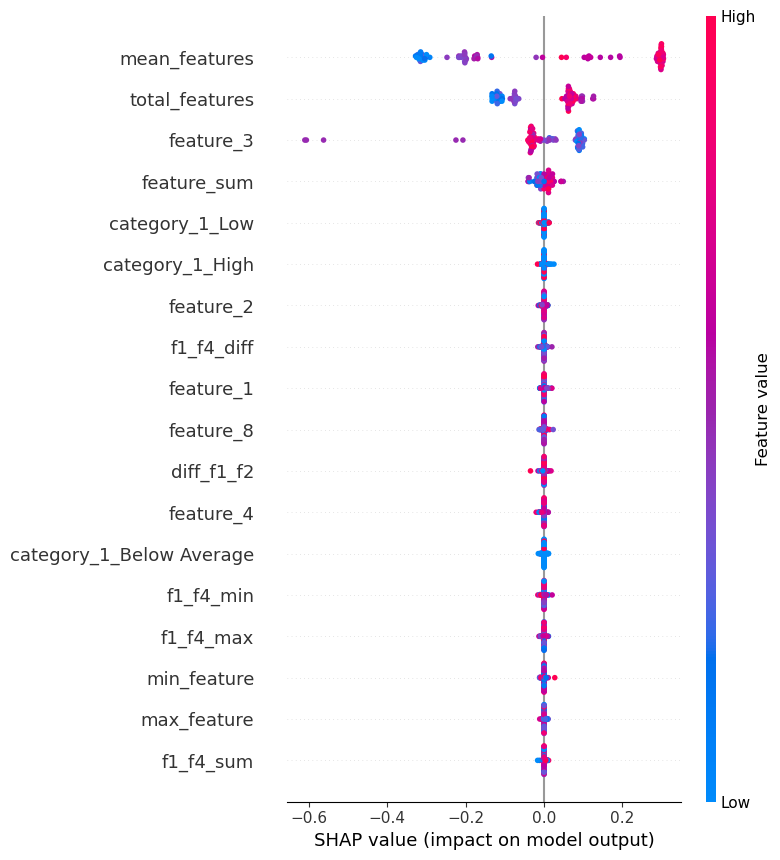

In [62]:
#AdaBoost SHAP
#Ensure all features are of float type
X_explain = X_test[:100].copy()
for col in X_explain.select_dtypes(include='bool').columns:
    X_explain[col] = X_explain[col].astype(float)

#Select one tree from the AdaBoost model
tree = best_ab_model.estimators_[0]

#Create a KernelExplainer using predict_proba
explainer = shap.KernelExplainer(tree.predict_proba, X_explain)

#Get SHAP values: shape (100, 18, 2)
shap_values = explainer.shap_values(X_explain, nsamples=100)

#Use values for class 1: shape (100, 18)
shap_values_plot = shap_values[:, :, 1]

#Shape check
print("shap_values_plot:", shap_values_plot.shape)
print("X_explain:", X_explain.shape)
assert shap_values_plot.shape == X_explain.shape

#SHAP summary plot
shap.summary_plot(shap_values_plot, X_explain, max_display=X_explain.shape[1])

In [63]:
import lime
import lime.lime_tabular
from IPython.display import display, HTML

#Select instance to explain
i = 0
X_explain_np = X_train.values
data_row = X_test.iloc[i]

#Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_explain_np,
    feature_names=X_train.columns.tolist(),
    class_names=['0', '1'],
    mode='classification'
)

#Explain Random Forest prediction
exp_rf = explainer.explain_instance(
    data_row=data_row.values,
    predict_fn=best_rf_model.predict_proba
)

print("Random Forest:")
display(HTML(exp_rf.as_html()))

Random Forest:


D:\Anaconda\envs\moldo\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
#Explain Gradient Boosting prediction
exp_gb = explainer.explain_instance(
    data_row=data_row.values,
    predict_fn=best_gb_model.predict_proba
)

print("Gradient Boosting:")
display(HTML(exp_gb.as_html()))

D:\Anaconda\envs\moldo\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting:


In [65]:
#Explain AdaBoost prediction
exp_ab = explainer.explain_instance(
    data_row=data_row.values,
    predict_fn=best_ab_model.predict_proba
)

print("AdaBoost:")
display(HTML(exp_ab.as_html()))

D:\Anaconda\envs\moldo\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AdaBoost:
